In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim
import warnings
warnings.filterwarnings('ignore')


### Importing data set  

[Click here for Data set](https://drive.google.com/file/d/1F01_6rHPMM4akKiP6fyUX8GETC0hTnAd/view)

In [397]:
df=pd.read_csv(r"C:\Users\SAI PRAVEEN YERRA\Downloads\Deep Learning\ANN ATM Project\1471093-atm_bank_dataset.csv")

In [322]:
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


## Dataset description:
#### The dataset has 2244 entries with 11 features:
1. Id: This column having all unique values.
2. atm_name: This column holds only one entry 'Mount road ATM'
3. weekday: This column gives the information days.
4. festival_religion: This column having information about religion festival 'NH'-(NO Holiday),'H'-(Holiday),'N'-(National Holiday),'M'-(Major Religious Holiday),'C'-(Common Holiday).
5. working_day: It has 2 values H- holiday W-working day.
6. holiday_sequence: Holiday sequence 'WWW', 'WHH', 'HHW', 'HWW', 'WWH', 'HHH','WHW', 'HWH'.
7. trans_date_set: Date of the transaction made by the customer.
8. trans_month: Month of the transaction made by the customer.
9. trans_year: Year of the transaction made by the customer.
10. prevweek_mean: Previous week mean value for withdrawal of amount.
11. total_amount_withdrawn: Total amount withdrawn by the customer (target column)

In [323]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2244   │ │ int32       │ 6     │                                                          │
│ │ Number of columns │ 11     │ │ string      │ 5     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0    ┃ p25     ┃ p75     ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ id                       │   0 │     0 │    5700 │    3300 │    11 │    2800 │    8400 │    12000 │ ████▇█ │  │
│ │ trans_date_set           │   0 │     0 │     3.6 │     1.8 │     1 │       2 │       5 │        7 │ ▇▇▇▇▇█ │  │
│ │ trans_month              │   0 │     0 │     6.3 │     3.3 │     1 │       4 │       9 │       12 │ ▇███▇▅ │  │
│ │ trans_year               │   0 │     0 │    2000 │     1.9 │  2000 │    2000 │    2000 │     2000 │ ▆▆▆▆▆█ │  │
│ │ prevweek_mean            │   0 │     0 │  520000 │  190000 │  1800 │  420000 │  640000 │  1000000 │ ▁▂▄█▃▁ │  │
│ │ total_amount_withdra     │   0 │     0 │  520000 │  260000 │   100 │  350000 │  680000 │  1400000 │ ▄▆█▄▁  │  │
│ └──────────────────────────┴─────┴───────┴─────────┴─────────┴───────┴─────────┴─────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ atm_name                          │      0 │         0 │                         3 │                  6700 │  │
│ │ weekday                           │      0 │         0 │                         3 │                  6700 │  │
│ │ festival_religion                 │      0 │         0 │                         3 │                  6700 │  │
│ │ working_day                       │      0 │         0 │                         3 │                  6700 │  │
│ │ holiday_sequence                  │      0 │         0 │                         3 │                  6700 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [324]:
def value(data):
    for i in data.columns:
        print(f"{i}:{data[i].value_counts()}")       

In [325]:
value(df)

id:11       1
7539     1
7509     1
7514     1
7519     1
        ..
3720     1
3715     1
3710     1
3705     1
11585    1
Name: id, Length: 2244, dtype: int64
atm_name:Mount Road ATM    2244
Name: atm_name, dtype: int64
weekday:SUNDAY       525
SATURDAY     315
TUESDAY      291
WEDNESDAY    287
MONDAY       281
THURSDAY     273
FRIDAY       272
Name: weekday, dtype: int64
festival_religion:NH    2079
H       70
N       39
M       36
C       20
Name: festival_religion, dtype: int64
working_day:W    1281
H     963
Name: working_day, dtype: int64
holiday_sequence:WWW    703
HHW    542
WHH    320
HWW    278
WWH    271
WHW     55
HHH     48
HWH     27
Name: holiday_sequence, dtype: int64
trans_date_set:1    371
5    371
2    369
3    366
4    362
6    361
7     44
Name: trans_date_set, dtype: int64
trans_month:8     211
7     208
9     207
5     204
3     203
4     200
6     195
2     188
10    184
11    168
1     165
12    111
Name: trans_month, dtype: int64
trans_year:2012    364
2014  

In [326]:
df.head()

,id,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600,575300


### Data Visualization

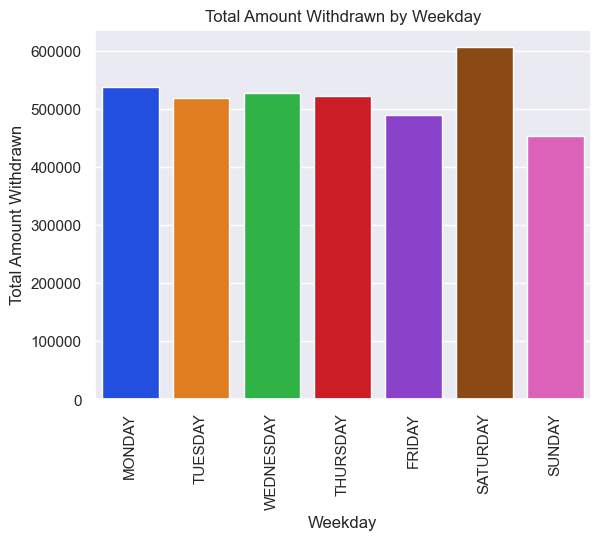

In [327]:
# Plot the bar chart with hue
ax = sns.barplot(x='weekday', y='total_amount_withdrawn', data=df, ci=None)

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn by Weekday')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Show the plot
plt.show()


Saturday has the highest withdrawal compared to remaining followed by Monday

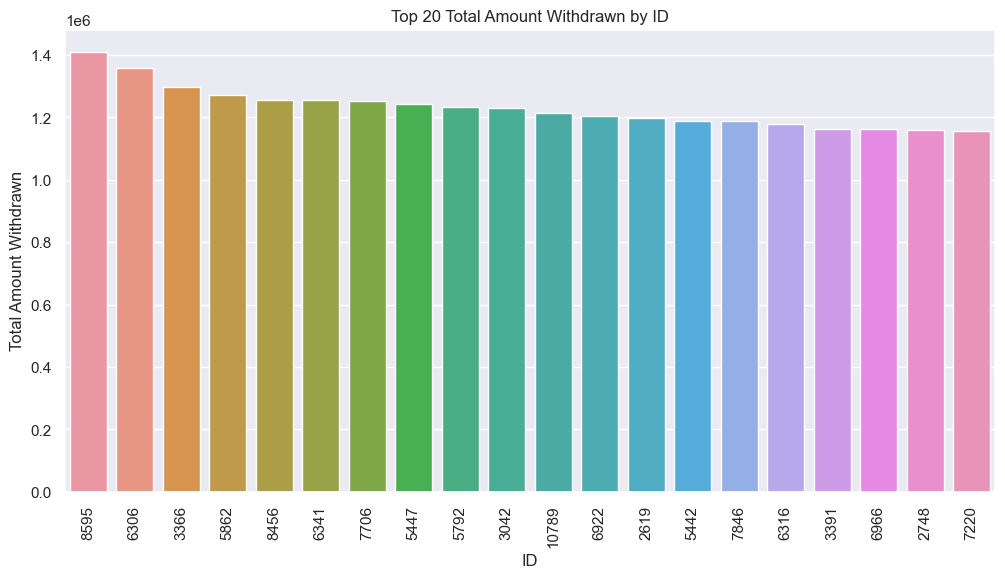

In [328]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort the dataframe by 'total_amount_withdrawn' in descending order
df_sorted = df.sort_values('total_amount_withdrawn', ascending=False)

# Select the top 20 rows
top_20 = df_sorted.head(20)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
ax = sns.barplot(x='id', y='total_amount_withdrawn', data=top_20, ci=None, order=top_20['id'])

# Add labels and title
plt.xlabel('ID')
plt.ylabel('Total Amount Withdrawn')
plt.title('Top 20 Total Amount Withdrawn by ID')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


ATM ID 8595 has highest withdrawal compared with other ATM's

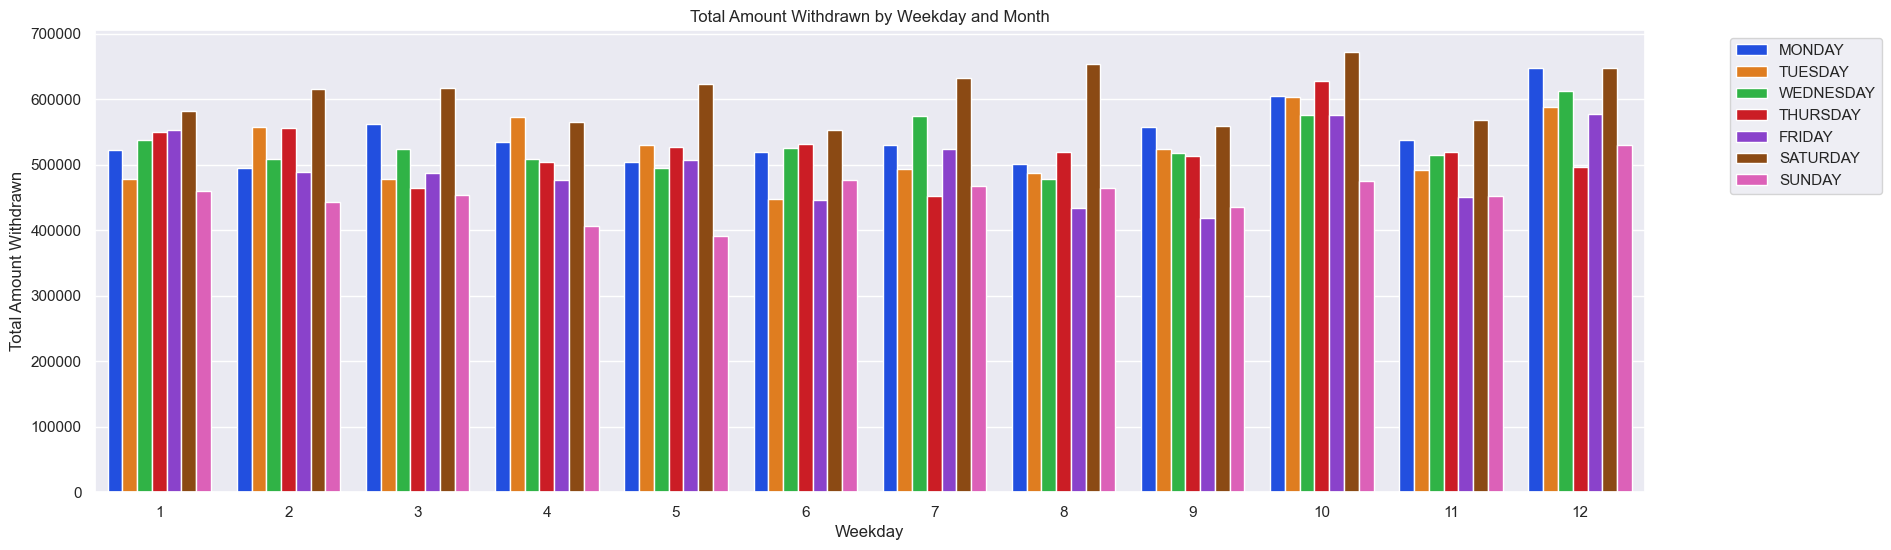

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 6))
# Plot the bar chart with hue
ax = sns.barplot(x='trans_month', y='total_amount_withdrawn', hue='weekday', data=df, ci=None)

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn by Weekday and Month')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


Above plot shows that the "Saturday" has the highest money withdrawal in ever Month compared to remaining days in a Week

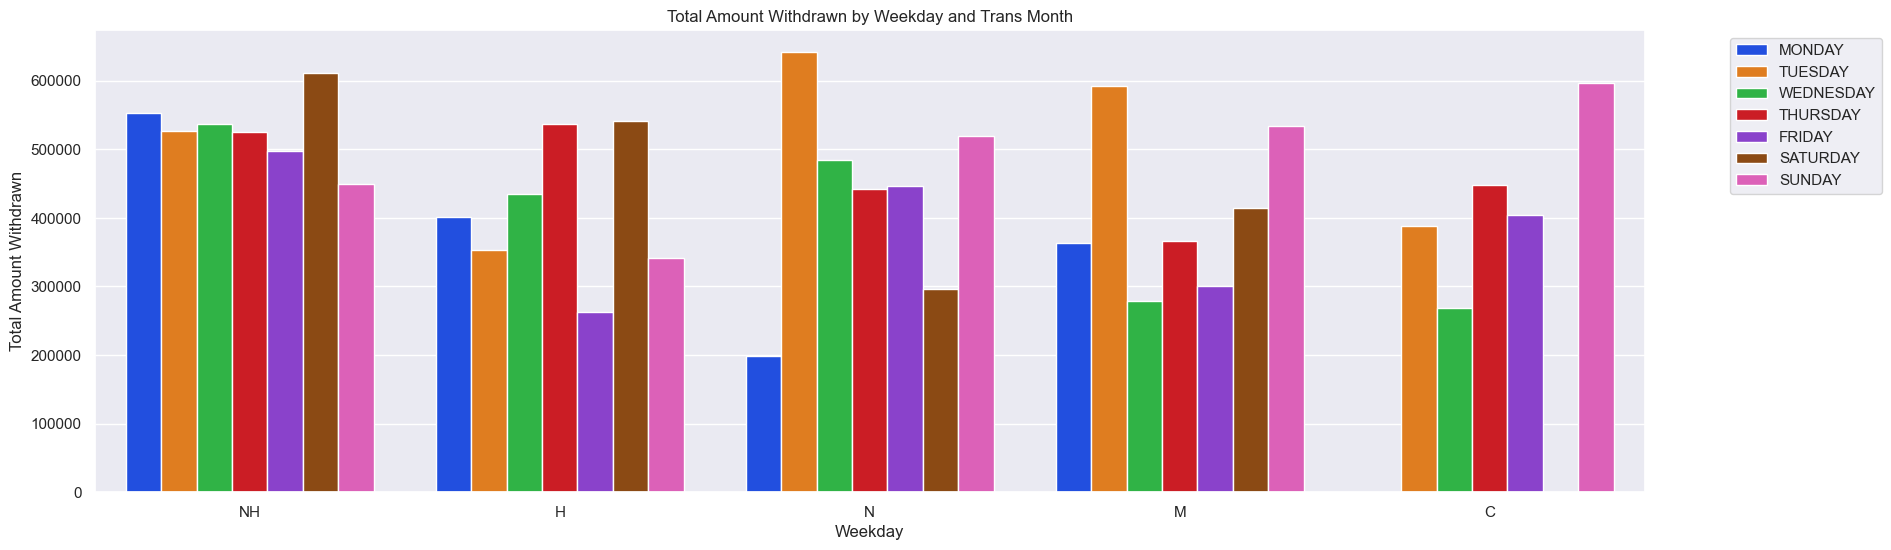

In [331]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 6))

# Plot the bar chart with hue
ax= sns.barplot(x='festival_religion', y='total_amount_withdrawn', hue='weekday', data=df, ci=None)

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Total Amount Withdrawn')
plt.title('Total Amount Withdrawn by Weekday and Trans Month')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


According to the above plot we can easyly identefied that Saturday has highest withdrawals in NH(No Holidays) & H(Holidays),Tuesday has highest withdrawals in N(National Holiday) & M(Major Religious Holidays) as well as Sunday has the Highest in C(Common Holiday) and 2nd highest in N & M   

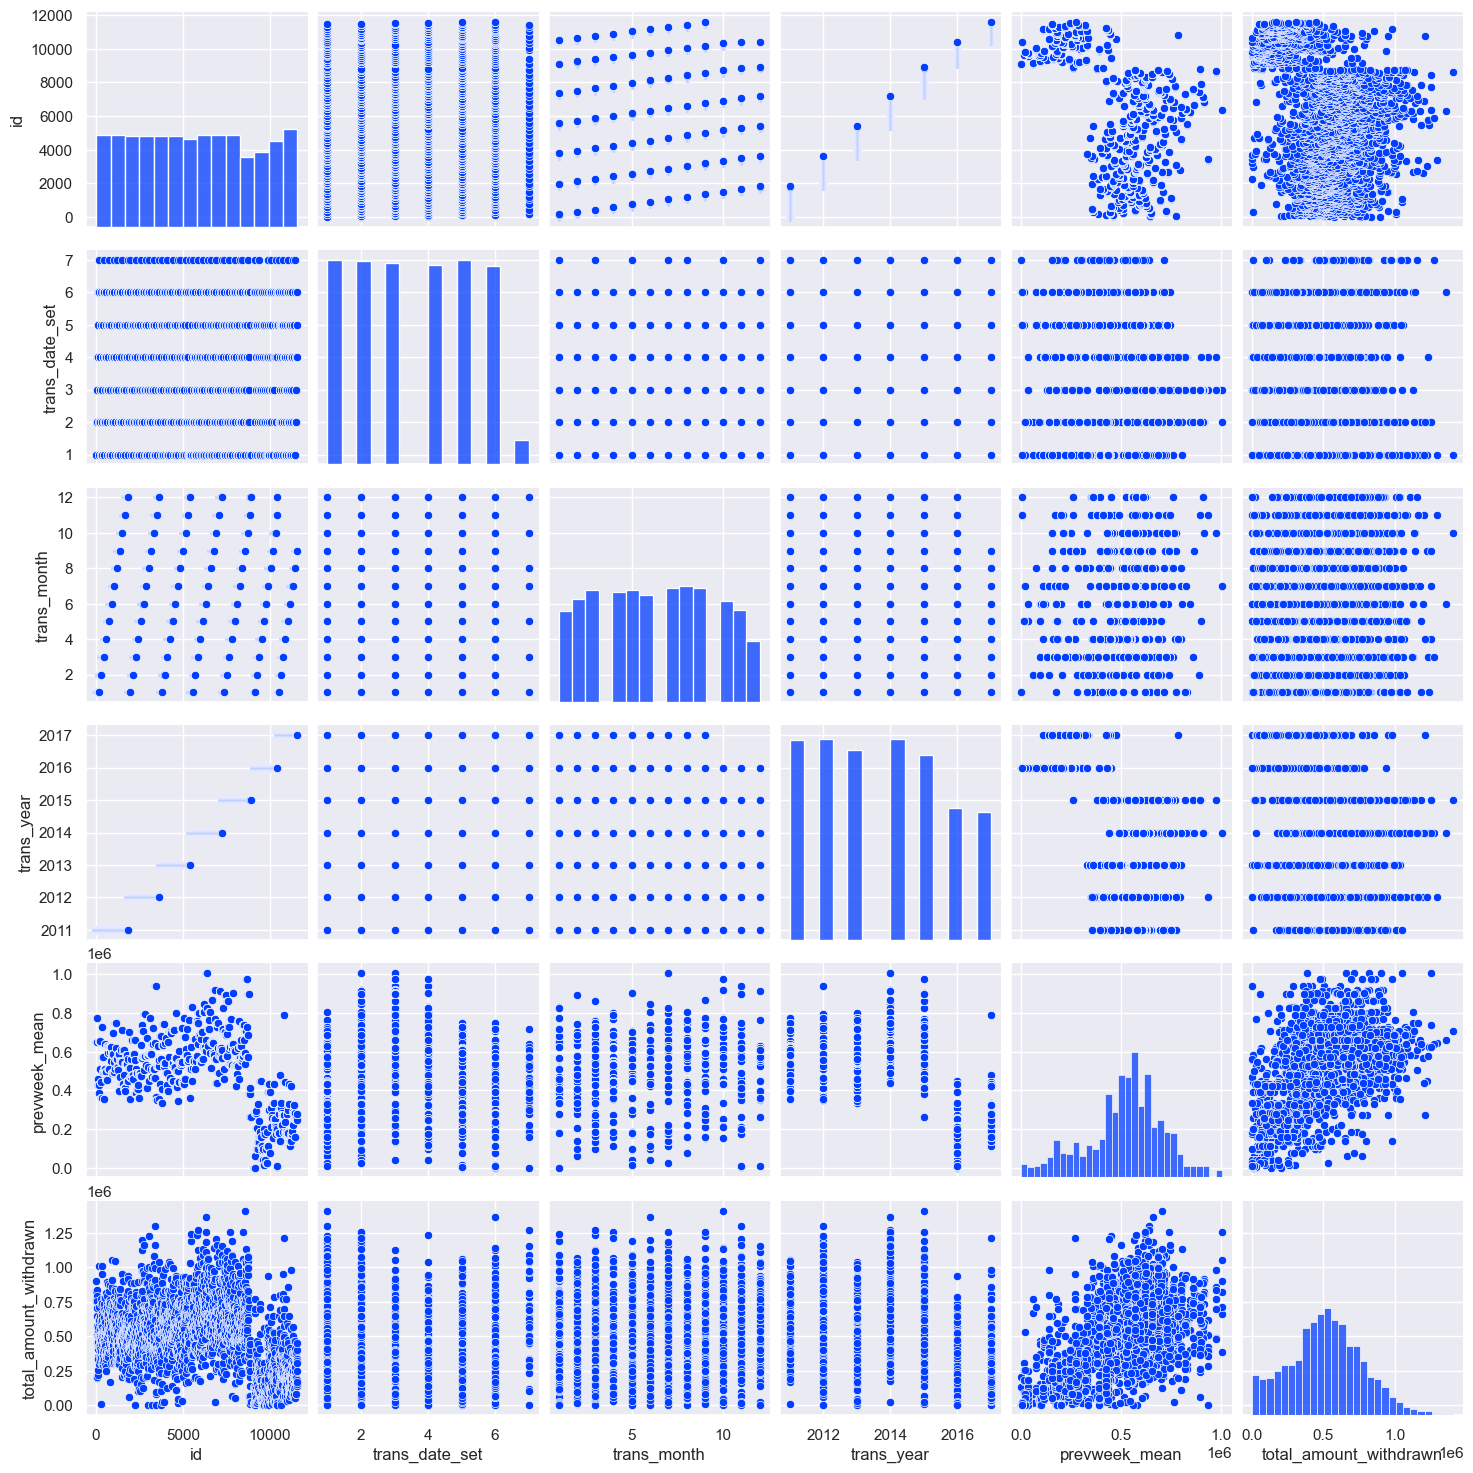

In [332]:
import seaborn as sns
sns.set(style='darkgrid', palette='bright')
sns.pairplot(df)
plt.show()


## Model Building

In [398]:
df.drop('atm_name',axis=1,inplace=True)

#### Convert the Categorical column in to Numarical and Perform Standardization 

In [399]:
categorical_cols = df.select_dtypes(include='object')
numerical_cols =df.iloc[:, :-1].select_dtypes(include='number') 

In [400]:
df=pd.get_dummies(df,columns=['weekday','festival_religion','working_day','holiday_sequence'])


In [410]:
corr=df.corr()
#selecting one feature amoung highly correlated varible
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1 = df[selected_columns]

In [411]:
df.head()

,id,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,...,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,11,1,1,2011,648600,897100,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,16,1,1,2011,648600,826000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,21,1,1,2011,648600,754400,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,26,2,1,2011,648600,834200,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,31,2,1,2011,648600,575300,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [412]:
from sklearn.model_selection import train_test_split
x = df1.drop(columns = ['total_amount_withdrawn'])
y = df1['total_amount_withdrawn']


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.20)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

#scaling target variable
ytrain=sc.fit_transform(ytrain.values.reshape(-1,1))
ytest=sc.transform(ytest.values.reshape(-1,1))

(1795, 24) (449, 24) (1795,) (449,)


### LinearRegression

In [416]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(xtrain,ytrain)
pred=model.predict(xtest)
#calculating RMSE,MSE,MAE and r2_score
from sklearn import metrics
MAE_lr=metrics.mean_absolute_error(ytest,pred)
MSE_lr=metrics.mean_squared_error(ytest,pred)
RMSE_lr=np.sqrt(MSE_lr)
r2_lr=metrics.r2_score(ytest,pred)

print(MAE_lr)
print(MSE_lr)
print(RMSE_lr)                    
print(r2_lr)

0.5999060883212759
0.5823048609454354
0.7630890255700414
0.39109594110240853


### SVM

In [417]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(xtrain,ytrain)
y_pred = regressor.predict(xtest)
MAE_svr=metrics.mean_absolute_error(ytest,y_pred)
MSE_svr=metrics.mean_squared_error(ytest,y_pred)
RMSE_svr=np.sqrt(MSE_svr)
r2_svr=metrics.r2_score(ytest,y_pred)

print(MAE_svr)
print(MSE_svr)
print(RMSE_svr)   
print(r2_svr)

0.5431919083043171
0.5026357484417043
0.7089680870403859
0.47440427188557954


### XGBoost

In [422]:
import xgboost as xgb

model_xgb=xgb.XGBRegressor()
model_xgb.fit(xtrain,ytrain)
pred=model_xgb.predict(xtest)
from sklearn import metrics
MAE_xb=metrics.mean_absolute_error(ytest,pred)
MSE_xb=metrics.mean_squared_error(ytest,pred)
RMSE_xb=np.sqrt(MSE_xb)
r2_xb=metrics.r2_score(ytest,pred)

print(MAE_xb)
print(MSE_xb)
print(RMSE_xb)   
print(r2_xb)

0.5017044993465932
0.4295763880790691
0.6554207717787628
0.5508009225902333


## ANN

In [468]:
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Build the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(24,), activation='relu'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))


# Adding more hidden layers
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(units=128))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))
model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(0.2))

model.add(Dense(units=1))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(xtrain, ytrain, epochs=600, batch_size=100, verbose=1)

# Evaluate the model
y_pred = model.predict(xtest)


Epoch 1/600
18/18 [==============================] - 3s 13ms/step - loss: 1.4424
Epoch 2/600
18/18 [==============================] - 0s 18ms/step - loss: 1.0763
Epoch 3/600
18/18 [==============================] - 0s 18ms/step - loss: 1.0311
Epoch 4/600
18/18 [==============================] - 0s 16ms/step - loss: 0.9222
Epoch 5/600
18/18 [==============================] - 0s 15ms/step - loss: 0.8868
Epoch 6/600
18/18 [==============================] - 0s 14ms/step - loss: 0.8352
Epoch 7/600
18/18 [==============================] - 0s 15ms/step - loss: 0.8309
Epoch 8/600
18/18 [==============================] - 0s 15ms/step - loss: 0.7549
Epoch 9/600
18/18 [==============================] - 0s 13ms/step - loss: 0.7675
Epoch 10/600
18/18 [==============================] - 0s 14ms/step - loss: 0.7679
Epoch 11/600
18/18 [==============================] - 0s 12ms/step - loss: 0.6997
Epoch 12/600
18/18 [==============================] - 0s 14ms/step - loss: 0.7401
Epoch 13/600
18/18 [=====

18/18 [==============================] - 0s 13ms/step - loss: 0.4579
Epoch 102/600
18/18 [==============================] - 0s 14ms/step - loss: 0.4594
Epoch 103/600
18/18 [==============================] - 0s 17ms/step - loss: 0.4659
Epoch 104/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4741
Epoch 105/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4592
Epoch 106/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4467
Epoch 107/600
18/18 [==============================] - 0s 17ms/step - loss: 0.4670
Epoch 108/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4593
Epoch 109/600
18/18 [==============================] - 0s 17ms/step - loss: 0.4621
Epoch 110/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4544
Epoch 111/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4719
Epoch 112/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4403
Epoch 113/600
18/1

Epoch 200/600
18/18 [==============================] - 0s 13ms/step - loss: 0.4074
Epoch 201/600
18/18 [==============================] - 0s 15ms/step - loss: 0.4156
Epoch 202/600
18/18 [==============================] - 0s 15ms/step - loss: 0.4231
Epoch 203/600
18/18 [==============================] - 0s 14ms/step - loss: 0.4099
Epoch 204/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4108
Epoch 205/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4071
Epoch 206/600
18/18 [==============================] - 0s 15ms/step - loss: 0.4192
Epoch 207/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4227
Epoch 208/600
18/18 [==============================] - 0s 17ms/step - loss: 0.4118
Epoch 209/600
18/18 [==============================] - 0s 18ms/step - loss: 0.4152
Epoch 210/600
18/18 [==============================] - 0s 15ms/step - loss: 0.4034
Epoch 211/600
18/18 [==============================] - 0s 16ms/step - loss: 0.4130
Epoc

18/18 [==============================] - 0s 14ms/step - loss: 0.3970
Epoch 299/600
18/18 [==============================] - 0s 15ms/step - loss: 0.3919
Epoch 300/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3861
Epoch 301/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3892
Epoch 302/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3787
Epoch 303/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3891
Epoch 304/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3852
Epoch 305/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3694
Epoch 306/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3759
Epoch 307/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3762
Epoch 308/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3923
Epoch 309/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3794
Epoch 310/600
18/1

18/18 [==============================] - 0s 15ms/step - loss: 0.3699
Epoch 397/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3695
Epoch 398/600
18/18 [==============================] - 0s 11ms/step - loss: 0.3716
Epoch 399/600
18/18 [==============================] - 0s 8ms/step - loss: 0.3683
Epoch 400/600
18/18 [==============================] - 0s 8ms/step - loss: 0.3664
Epoch 401/600
18/18 [==============================] - 0s 12ms/step - loss: 0.3789
Epoch 402/600
18/18 [==============================] - 0s 11ms/step - loss: 0.3745
Epoch 403/600
18/18 [==============================] - 0s 13ms/step - loss: 0.3702
Epoch 404/600
18/18 [==============================] - 0s 13ms/step - loss: 0.3789
Epoch 405/600
18/18 [==============================] - 0s 14ms/step - loss: 0.3775
Epoch 406/600
18/18 [==============================] - 0s 14ms/step - loss: 0.3839
Epoch 407/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3605
Epoch 408/600
18/18 

18/18 [==============================] - 0s 14ms/step - loss: 0.3652
Epoch 495/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3592
Epoch 496/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3417
Epoch 497/600
18/18 [==============================] - 0s 14ms/step - loss: 0.3493
Epoch 498/600
18/18 [==============================] - 0s 15ms/step - loss: 0.3585
Epoch 499/600
18/18 [==============================] - 0s 16ms/step - loss: 0.3602
Epoch 500/600
18/18 [==============================] - 0s 19ms/step - loss: 0.3590
Epoch 501/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3509
Epoch 502/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3682
Epoch 503/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3679
Epoch 504/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3594
Epoch 505/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3625
Epoch 506/600
18/1

18/18 [==============================] - 0s 16ms/step - loss: 0.3511
Epoch 593/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3455
Epoch 594/600
18/18 [==============================] - 0s 19ms/step - loss: 0.3462
Epoch 595/600
18/18 [==============================] - 0s 19ms/step - loss: 0.3553
Epoch 596/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3499
Epoch 597/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3385
Epoch 598/600
18/18 [==============================] - 0s 18ms/step - loss: 0.3405
Epoch 599/600
18/18 [==============================] - 0s 17ms/step - loss: 0.3592
Epoch 600/600
15/15 [==============================] - 0s 3ms/step


In [470]:
MSE_ANN_ = metrics.mean_squared_error(ytest, y_pred)
MAE_ANN = metrics.mean_absolute_error(ytest, y_pred)
RMSE_ANN = np.sqrt(mse)
R2_ANN = metrics.r2_score(ytest, y_pred)

print('Mean Squared Error:', MSE_ANN_)
print('Mean Absolute Error:', MAE_ANN)
print('Root Mean Squared Error:', RMSE_ANN)
print('R-squared:', R2_ANN)

Mean Squared Error: 0.47602054300264474
Mean Absolute Error: 0.5189239702736447
Root Mean Squared Error: 0.8651564756095674
R-squared: 0.5022352375998692


## Conclusion 
Based on the evaluation metrics, the ANN model exhibits the highest predictive performance among the evaluated models, followed by support vector regression and XGBoost regression. On the other hand, linear regression demonstrates the lowest performance among the models. It's important to note that these observations are specific to the dataset and experimental setup used in this context. To validate the performance of the models on different datasets and identify potential areas for improvement, further analysis and experimentation are recommended.